In [1]:
from __future__ import annotations
import xarray as xr
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import logging
import numpy as np
import pandas as pd
import xarray as xr
import pv_functions
import os
import glob
import os
import re
import cftime

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable albedo as the horizontal dimensions for the regridding.
  warnings.warn(


In [25]:
# Define the directory and file paths
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/ACCESS-CM2/"
field = "specific generation"

In [26]:
import xarray as xr

path_BOC = f"{diri}/historical/"
files_BOC = [f"{path_BOC}solar_power_{year}.nc_aggregated" for year in range(1980, 2015)]

# Open each file and assign a time coordinate as the year
datasets_BOC = []
for year, file in zip(range(1980, 2015), files_BOC):
    ds_BOC = xr.open_dataset(file)
    ds_BOC = ds_BOC.expand_dims(time=[year])  # Add a time dimension with the year as an integer
    datasets_BOC.append(ds_BOC)

# Combine all datasets along the time dimension
combined_ds_BOC = xr.concat(datasets_BOC, dim="time")

# Calculate the mean across all years
mean_power_BOC = combined_ds_BOC[field].mean(dim="time")

# Save the result to a new NetCDF file (optional)
mean_power_BOC.to_netcdf(f"{path_BOC}mean_solar_power_BOC.nc")

# Print the result
print(mean_power_BOC)

<xarray.DataArray 'specific generation' (lat: 26, lon: 25)> Size: 5kB
array([[1691.18629213, 1750.17422441, 1777.17608676, 1837.48825894,
        1947.48537429, 1889.63708267, 1923.4204795 , 1964.9910993 ,
        1950.6366081 , 1928.58372325, 1911.706385  , 1903.15282654,
        1797.90983174, 1770.95956158, 1782.92978247, 1781.91836857,
        1769.54124018, 1758.17450622, 1797.51156825, 1802.13563934,
        1803.85616154, 1823.0496529 , 1813.80003164, 1807.08592462,
        1364.77592632],
       [1526.64526615, 1572.52002748, 1588.9620185 , 1596.94768333,
        1694.82404058, 1695.03620296, 1679.72735807, 1707.56351361,
        1740.36538236, 1717.303218  , 1728.14592481, 1678.07446766,
        1632.78438367, 1614.36412978, 1628.53223321, 1618.65632401,
        1607.34429242, 1609.97950014, 1649.79216397, 1665.50987154,
        1665.93577499, 1687.10225428, 1664.96582924, 1652.04153624,
        1493.06991729],
       [1488.03262858, 1560.21078391, 1568.499197  , 1524.97527291

In [27]:
path_EOC = f"{diri}/ssp585/"
files_EOC = [f"{path_EOC}solar_power_{year}.nc_aggregated" for year in range(2065, 2100)]

# Open each file and assign a time coordinate as the year
datasets_EOC = []
for year, file in zip(range(2065, 2100), files_EOC):
    ds_EOC = xr.open_dataset(file)
    ds_EOC = ds_EOC.expand_dims(time=[year])  # Add a time dimension with the year as an integer
    datasets_EOC.append(ds_EOC)

# Combine all datasets along the time dimension
combined_ds_EOC = xr.concat(datasets_EOC, dim="time")

# Calculate the mean across all years
mean_power_EOC = combined_ds_EOC[field].mean(dim="time")

# Save the result to a new NetCDF file (optional)
mean_power_EOC.to_netcdf(f"{path}mean_solar_power_EOC.nc")

# Print the result
print(mean_power_EOC)

<xarray.DataArray 'specific generation' (lat: 26, lon: 25)> Size: 5kB
array([[1712.39171259, 1819.02340638, 1866.23946748, 1931.69564862,
        2018.40045235, 1952.17985764, 1971.20164036, 1994.60988893,
        1950.56145756, 1920.80032924, 1914.14985958, 1923.71263997,
        1823.84880307, 1809.63862559, 1833.19235027, 1834.66467678,
        1834.38830159, 1820.91216798, 1864.97443828, 1867.50894668,
        1852.23931768, 1868.68169516, 1856.34156241, 1850.97563681,
        1415.85900282],
       [1555.78930429, 1606.39509818, 1643.49464813, 1670.99733928,
        1765.72997869, 1770.63257698, 1761.67191371, 1775.22603065,
        1772.16876012, 1725.84955153, 1735.44989754, 1692.73779381,
        1658.77504866, 1652.37654616, 1664.73111605, 1658.54393585,
        1653.53129879, 1672.36048049, 1717.18518878, 1723.71085386,
        1705.76014414, 1723.75627896, 1704.61743842, 1691.94882121,
        1561.62151418],
       [1523.91760817, 1606.06045026, 1601.37314835, 1555.637083  

In [28]:
# Assuming mean_power_EOC and mean_power_BOC are xarray.DataArray objects
relative_difference = (mean_power_EOC - mean_power_BOC) / mean_power_BOC * 100

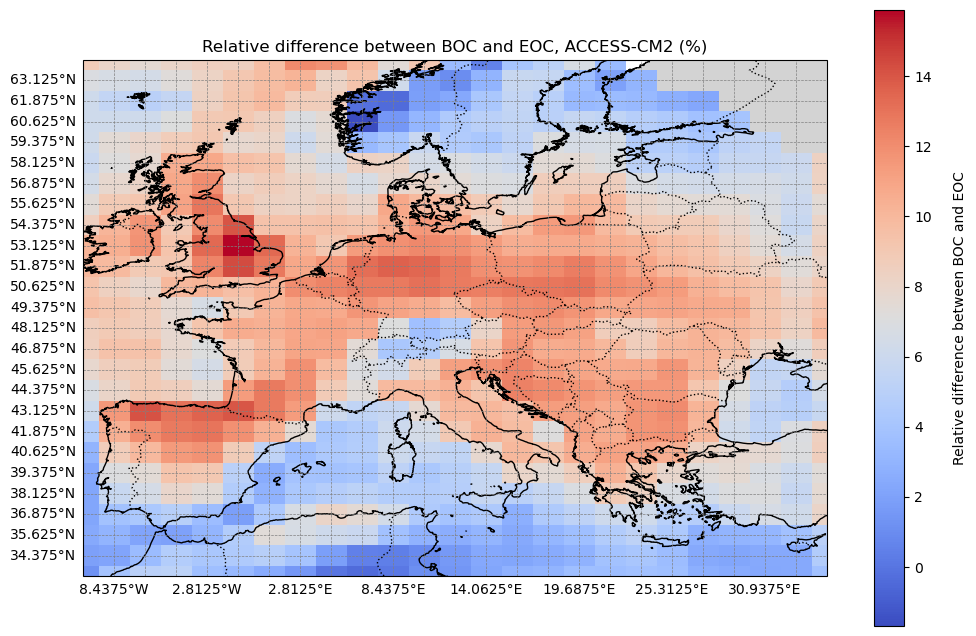

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Extract longitude, latitude, and the variable to plot
lon = relative_difference.lon
lat = relative_difference.lat  # Replace 'solar_power' with the actual variable name in ds_power

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Plot the solar power data
c = ax.pcolormesh(
    lon, lat, relative_difference,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar power
    shading='auto',# Smooth shading
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Relative difference between BOC and EOC, ACCESS-CM2 (%)")

# Add gridlines aligned with x and y coordinates
gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    x_inline=False, 
    y_inline=False
)
gridlines.xlocator = plt.FixedLocator(lon.values)  # Use longitude values for x gridlines
gridlines.ylocator = plt.FixedLocator(lat.values)  # Use latitude values for y gridlines

gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical')
cbar.set_label('Relative difference between BOC and EOC', rotation=90, labelpad=15)

plt.show()

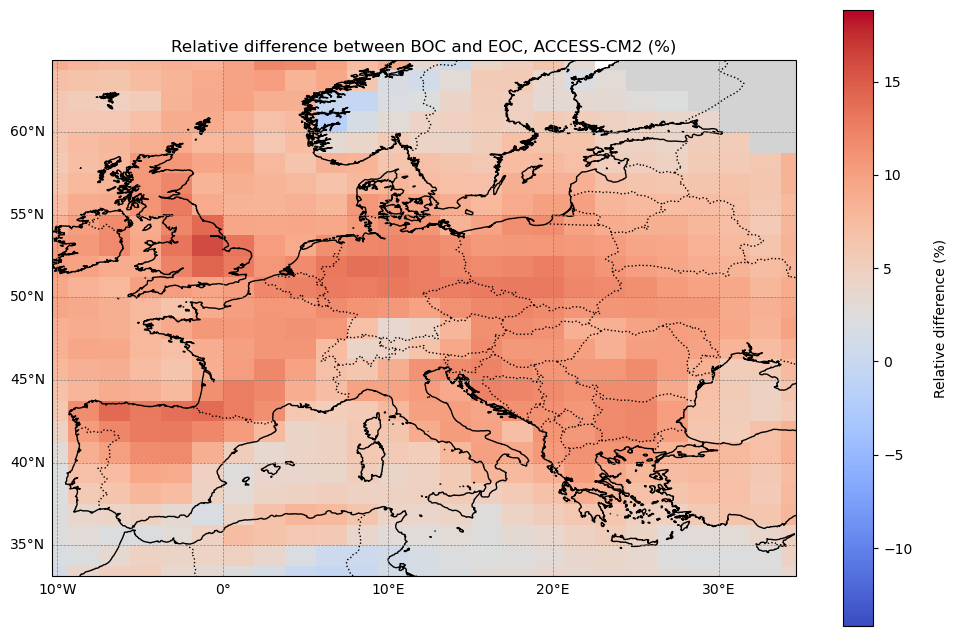

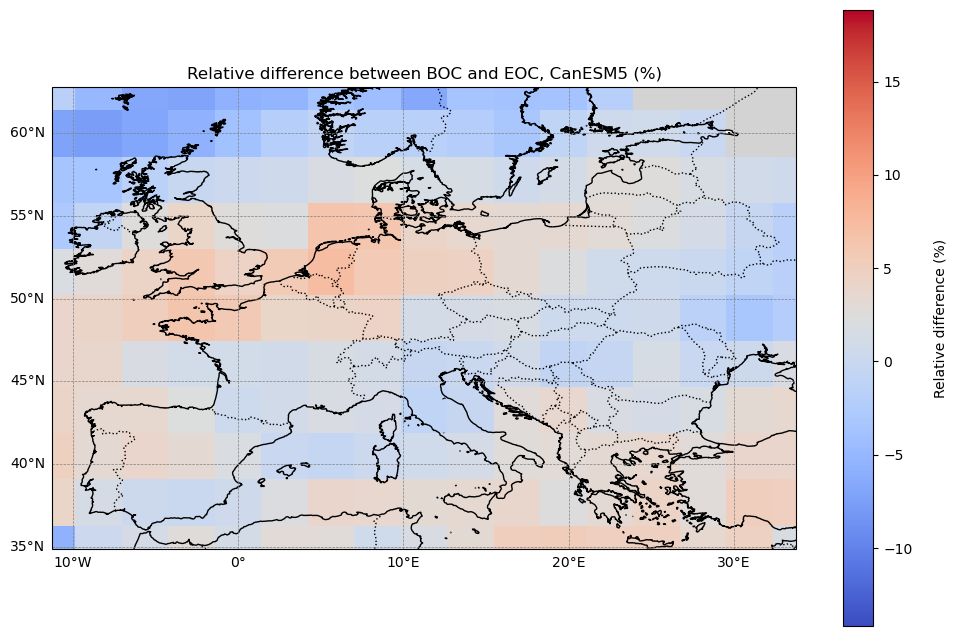

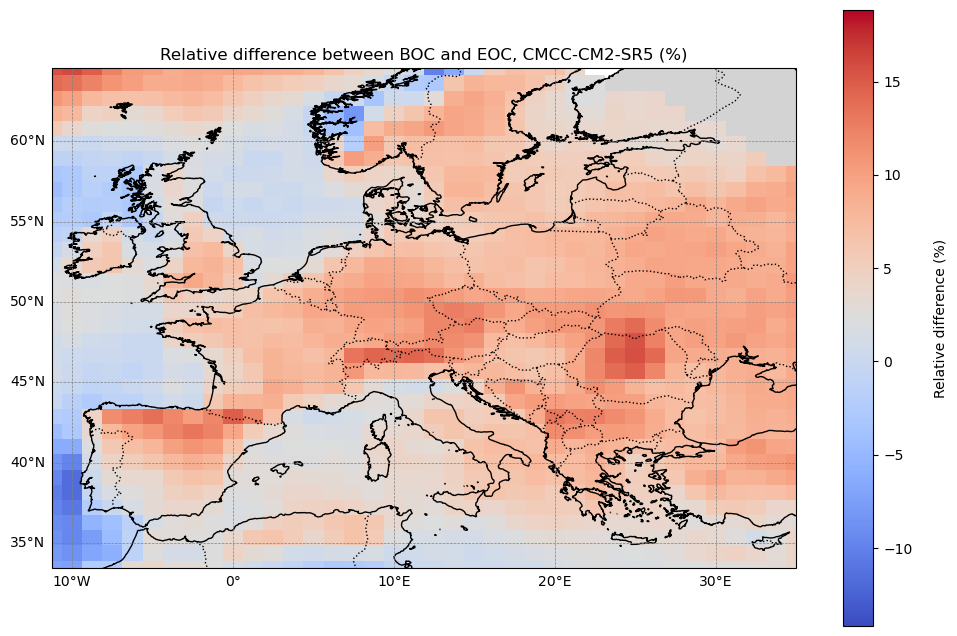

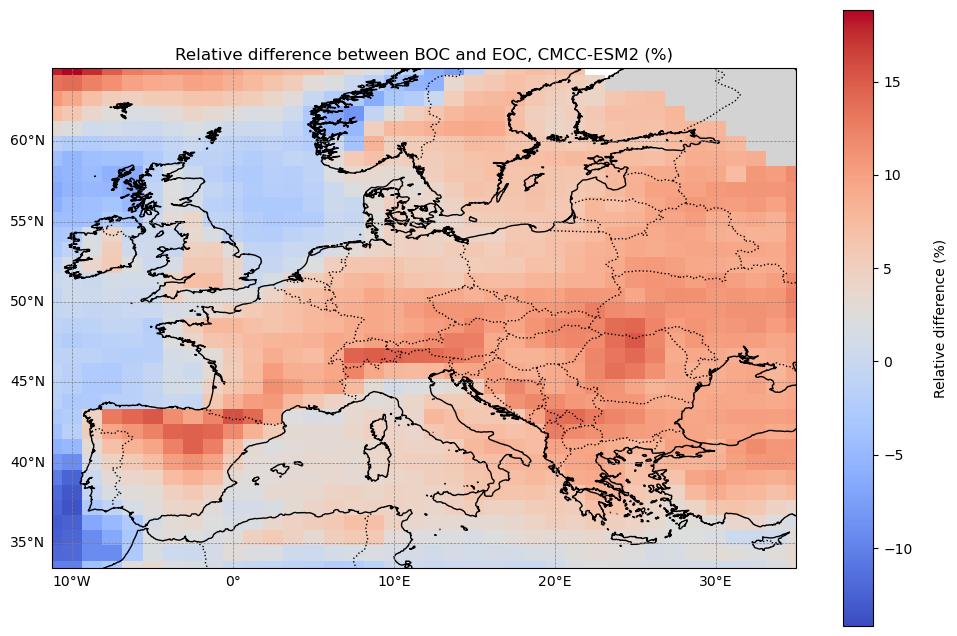

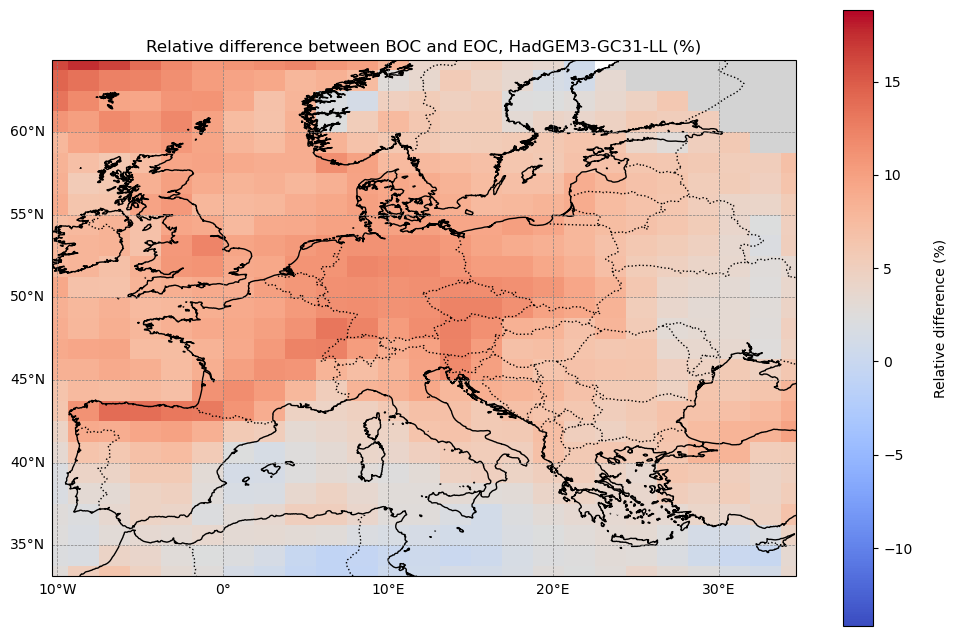

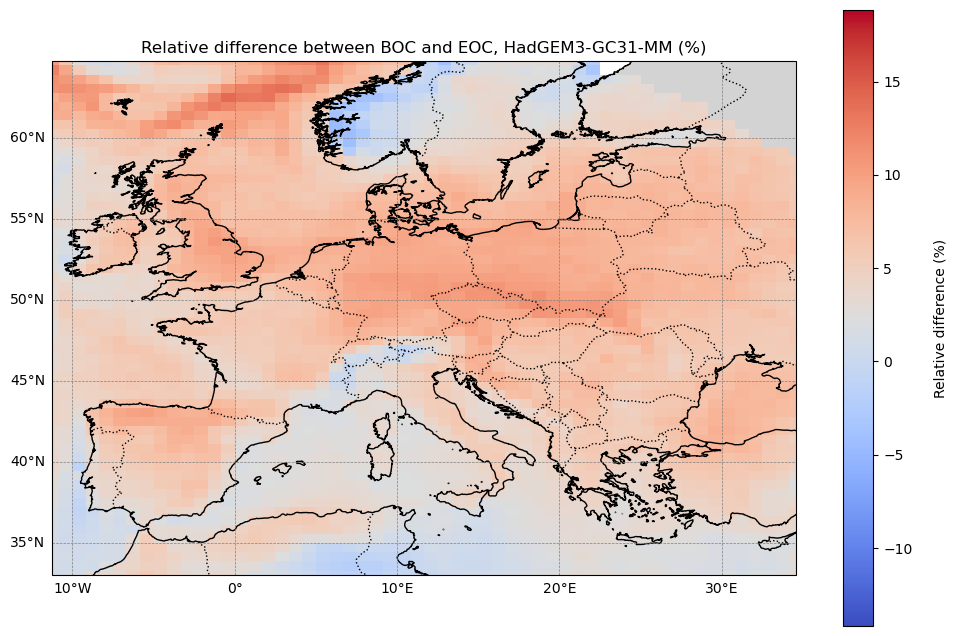

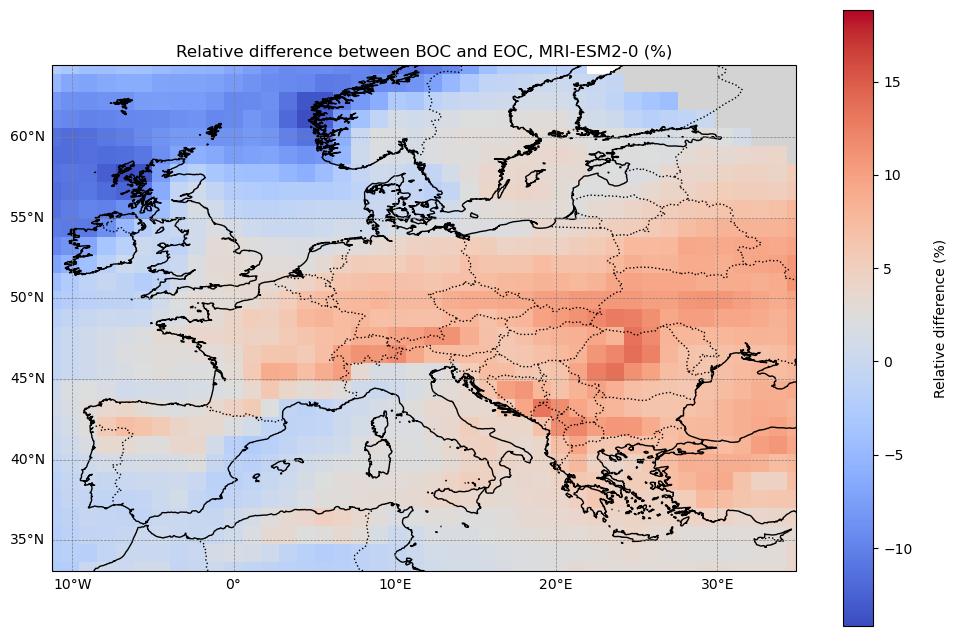

In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2","HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]  # Replace with actual model names
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/"

# Initialize vmin and vmax
vmin = float("inf")
vmax = float("-inf")

# Dictionary to store relative differences for each model
relative_differences = {}

# Loop through each model
for model in models:
    # Define paths for BOC and EOC
    path_BOC = f"{diri}/{model}/historical/"
    path_EOC = f"{diri}/{model}/ssp585/"
    
    # Load BOC files
    files_BOC = [f"{path_BOC}solar_power_{year}.nc_aggregated" for year in range(1980, 2015)]
    datasets_BOC = []
    for year, file in zip(range(1980, 2015), files_BOC):
        ds_BOC = xr.open_dataset(file, engine="netcdf4")
        ds_BOC = ds_BOC.expand_dims(time=[year])
        datasets_BOC.append(ds_BOC)
    combined_ds_BOC = xr.concat(datasets_BOC, dim="time")
    mean_power_BOC = combined_ds_BOC["specific generation"].mean(dim="time")
    
    # Load EOC files
    files_EOC = [f"{path_EOC}solar_power_{year}.nc_aggregated" for year in range(2065, 2100)]
    datasets_EOC = []
    for year, file in zip(range(2065, 2100), files_EOC):
        ds_EOC = xr.open_dataset(file)
        ds_EOC = ds_EOC.expand_dims(time=[year])
        datasets_EOC.append(ds_EOC)
    combined_ds_EOC = xr.concat(datasets_EOC, dim="time")
    mean_power_EOC = combined_ds_EOC["specific generation"].mean(dim="time")
    
    # Calculate relative difference
    relative_difference = (mean_power_EOC - mean_power_BOC) / mean_power_BOC * 100
    relative_differences[model] = relative_difference
    
    # Update vmin and vmax
    vmin = min(vmin, relative_difference.min().values)
    vmax = max(vmax, relative_difference.max().values)

# Plot relative differences for each model
for model, relative_difference in relative_differences.items():
    lon = relative_difference.lon
    lat = relative_difference.lat

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

    # Plot the relative difference
    c = ax.pcolormesh(
        lon, lat, relative_difference,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        shading='auto',
        vmin=vmin,  # Use global vmin
        vmax=vmax,  # Use global vmax
    )

    # Add map features
    ax.coastlines(resolution='10m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.set_title(f"Relative difference between BOC and EOC, {model} (%)")

    # Add gridlines
    gridlines = ax.gridlines(
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        linestyle='--',
        x_inline=False,
        y_inline=False
    )
    gridlines.top_labels = False
    gridlines.right_labels = False

    # Add colorbar
    cbar = fig.colorbar(c, ax=ax, orientation='vertical')
    cbar.set_label('Relative difference (%)', rotation=90, labelpad=15)

    plt.show()